# Latency Developer


In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Settings
filepath = '/home/farah/Workspace/statefun-ndb-benchmark/output-consumer/output-data/25-03-2022_15:30/part-00000-02640f12-c417-416a-8d91-30034f2f6ab9-c000.json'

In [3]:
# Preprocessing
df = pd.read_json(filepath, lines=True)

first_timestamp = df["inputKafkaTimestamp"][0]
df["latency"] = df["outputKafkaTimestamp"] - df["inputKafkaTimestamp"]
# Start time of event in seconds, counted from initial event
df["startTime"] = (df["inputKafkaTimestamp"] - first_timestamp)/1000


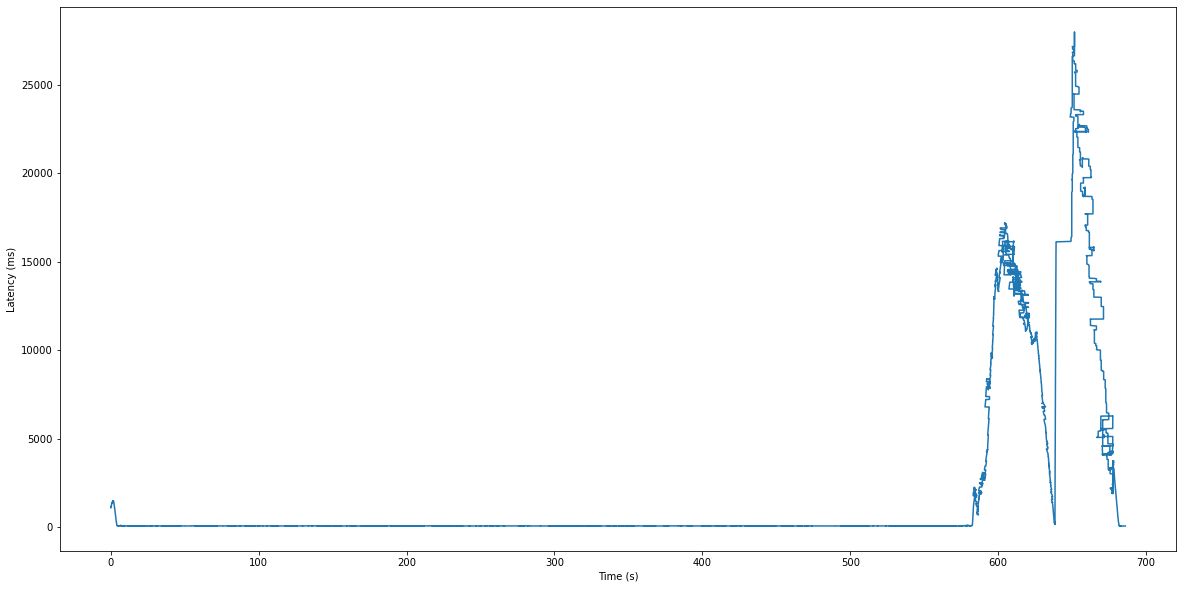

In [17]:
# Latency plot
plt.figure(figsize=(20, 10))

# Mean of rolling windows
latency = df["latency"].rolling(window=1000, min_periods=0, center=True).mean()

plt.ylabel("Latency (ms)")
plt.xlabel("Time (s)")

#plt.ylim([0, 300])

plt.plot(df["startTime"], latency)

In [5]:
# Throughput plot
